In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def f(x):
    return 3*x**2 - 4*x + 5

In [14]:
f(3.0)

20.0

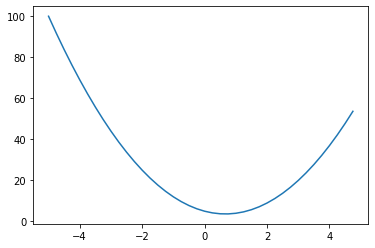

In [15]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [24]:
h = 0.0001
def derivative_info(x, delta):
    print(f"fn value at x: {f(x)}")
    print(f"fn value at x+h: {f(x+h)}")
    print(f"difference in value: {f(x+h) - f(x)}")
    print(f"slope (strength/rate of change of dependent variable as independent var changes: {(f(x+h)-f(x))/h}")

In [25]:
derivative_info(3, h)

fn value at x: 20
fn value at x+h: 20.001400030000006
difference in value: 0.0014000300000063248
slope (strength/rate of change of dependent variable as independent var changes: 14.000300000063248


In [26]:
derivative_info(-3, h)

fn value at x: 44
fn value at x+h: 43.99780002999999
difference in value: -0.0021999700000066014
slope (strength/rate of change of dependent variable as independent var changes: -21.999700000066014


In [53]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
L = d * f; L.label='L'
print(d, d._prev, d._op)

Value(data=4.0) {Value(data=10.0), Value(data=-6.0)} +


In [54]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes,edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges
            
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #LR = left to right 
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label = "{ %s | data %.4f}" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            #and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        #connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

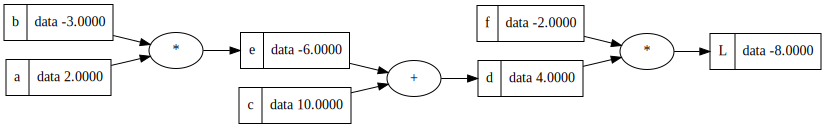

In [58]:
draw_dot(L)